In [4]:
# Import relevant modules
# ImagePrediction is a helper module (helpers/image_models) that assists with setting up the image recognition models
# and getting a prediction.
from helpers.image_models import ImagePrediction
# Ground truth helper so we can see the ground truth of an Imagenet image.
from validate_ground_truth.imagenet_ground_truth import ImagenetGroundTruth
# Instantiates the ImagePrediction object with the vgg16 model
predictor = ImagePrediction(model_name="vgg16")
# Instantiates the ImagenetGroundTruth object
ground_truth = ImagenetGroundTruth()
from PIL import Image
import math

2024-03-15 21:37:17.621531: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 21:37:17.621611: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 21:37:17.674912: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 21:37:17.789369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 21:37:18.839489: W tensorflow/compiler/tf2

1 Physical GPUs, 1 Logical GPUs
Version:  2.15.0
Eager mode:  True
GPU is available


In [5]:
import tensorflow as tf
import os
import pathlib
from helpers.image_models import decode_predictions
from pprint import pprint

dataset_path = pathlib.Path(os.getcwd() + "/initial_test_set")
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path.as_posix(), 
    image_size=(224, 224), 
    batch_size=32,
    shuffle=False
)

# get predictions with filenames
predictions = predictor.model.predict(image_dataset)

decoded = decode_predictions(predictions, top=1)

for i, image in enumerate(image_dataset.file_paths):
    print(f"Filename: {image.split('/')[-1]}")
    print(f"Prediction: {decoded[i]}")


Found 10 files belonging to 1 classes.


2024-03-15 21:37:31.428481: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
2024-03-15 21:37:31.671409: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 21:37:31.673987: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 21:37:31.674019: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:110] Couldn't get ptxas version : FAILED_PRECONDITION: Couldn't get ptxas/nvlink version string: INTERNAL: Couldn't invoke ptxas --version
2024-03-15 21:37:31.676357: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 21:37:31.676428: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptx

1/1 [==============================] - 2s 2s/step
Filename: arctic-fox.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.9508855)]
Filename: castle.jpg
Prediction: [('n02980441', 'castle', 0.97413325)]
Filename: iguana.jpg
Prediction: [('n01677366', 'common_iguana', 0.97907984)]
Filename: llama.jpg
Prediction: [('n02437616', 'llama', 0.96955395)]
Filename: salmon.jpg
Prediction: [('n02536864', 'coho', 0.87779117)]
Filename: siamese_cat.jpg
Prediction: [('n02123597', 'Siamese_cat', 0.9406723)]
Filename: tennis_racket.jpg
Prediction: [('n04039381', 'racket', 0.88522977)]
Filename: tiger.jpg
Prediction: [('n02129604', 'tiger', 0.9228468)]
Filename: truck.jpg
Prediction: [('n04467665', 'trailer_truck', 0.8349612)]
Filename: wolf.jpg
Prediction: [('n02114367', 'timber_wolf', 0.8401966)]


2024-03-15 21:37:33.144279: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:504] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-12.2
  /usr/local/cuda
  /home/rodin/Documents/AI-validation/.venv/lib/python3.11/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/rodin/Documents/AI-validation/.venv/lib/python3.11/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.
2024-03-15 21:37:33.183476: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024

In [102]:
import random
from PIL import ImageFilter
# 10 transformation functions
# 1. flip (metamorphic)
def flip_image(image, direction):
    return image.transpose(method=direction)
# 2. rotate (metamorphic)
def rotate_image(image, degrees):
    return image.rotate(degrees)
# 3. zoom
def zoom_image(image, zoom_factor):
    return image.resize((int(image.width * zoom_factor), int(image.height * zoom_factor)))
# 4. brightness
def brightness_image(image, factor):
    return image.point(lambda p: p * factor)
# 5. blur (contrast)
def blur(image, factor):
    return image.filter(ImageFilter.GaussianBlur(radius=factor))
# 6. add random noise 
def noise(image, factor):
    return image.point(lambda p: p + factor * (random.random() - 0.5))
# 7. hue
def hue_image(image, factor):
    return image.convert('HSV').point(lambda p: p * factor).convert('RGB')
# 8. shear
def shear_image(image, factor):
    return image.transform(image.size, Image.AFFINE, (1, factor, 0, 0, 1, 0))
# 9. remove a channel
def remove_channel(image, channel):
    r, g, b = image.split()
    if channel == "r":
        return Image.merge("RGB", (g, b, b))
    elif channel == "g":
        return Image.merge("RGB", (r, b, b))
    elif channel == "b":
        return Image.merge("RGB", (r, g, g))
    else:
        return image
# 10. spread
def spread_image(image, factor):
    return image.effect_spread(int(math.floor(image.width * factor)))

In [104]:
def generate_transformed_images(dataset_path, output_path, transformations):
    for subdir, dirs, files in os.walk(dataset_path):
        for file in files:
            file_path = os.path.join(subdir, file)
            image = Image.open(file_path)
            for transform in transformations:
                for i in range(1,11):
                    if transform.__name__ == "rotate_image":
                        transformed_image = transform(image, i * 34)
                    elif transform.__name__ == "zoom_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "brightness_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "blur":
                        transformed_image = transform(image, i)
                    elif transform.__name__ == "noise":
                        transformed_image = transform(image, i*10)
                    elif transform.__name__ == "hue_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "shear_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "remove_channel":
                        if i == 1:
                            transformed_image = transform(image, "r")
                        elif i == 2:
                            transformed_image = transform(image, "g")
                        elif i == 3:
                            transformed_image = transform(image, "b")
                        else:
                            continue
                    elif transform.__name__ == "spread_image":
                        transformed_image = transform(image, 0.09 * i)
                    elif transform.__name__ == "flip_image":
                        if i == 1:
                            transformed_image = transform(image, Image.Transpose.FLIP_LEFT_RIGHT)
                        elif i == 2:
                            transformed_image = transform(image, Image.Transpose.FLIP_TOP_BOTTOM)
                        else:
                            continue

                    output_file_path = os.path.join(output_path, f"{file.split('.')[0]}_{transform.__name__}_{i}.jpg")
                    transformed_image.save(output_file_path)


generate_transformed_images(dataset_path, "output_set/test", [flip_image, rotate_image, zoom_image,
                            brightness_image, blur, noise, hue_image, shear_image, remove_channel, spread_image])

In [105]:
transformed_dataset_path = pathlib.Path(os.getcwd() + "/output_set")
transformed_image_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    transformed_dataset_path.as_posix(), 
    image_size=(224, 224), 
    batch_size=32,
    shuffle=False
)

# create a new dataset from the transformed images
predictions = predictor.model.predict(transformed_image_dataset)

decoded = decode_predictions(predictions, top=1)

for i, image in enumerate(transformed_image_dataset.file_paths):
    print(f"Filename: {image.split('/')[-1]}")
    print(f"Prediction: {decoded[i]}")

Found 850 files belonging to 1 classes.


27/27 [==============================] - 1s 51ms/step
Filename: arctic-fox_blur_1.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.9289216)]
Filename: arctic-fox_blur_10.jpg
Prediction: [('n04153751', 'screw', 0.11378278)]
Filename: arctic-fox_blur_2.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.8917979)]
Filename: arctic-fox_blur_3.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.651073)]
Filename: arctic-fox_blur_4.jpg
Prediction: [('n07932039', 'eggnog', 0.099598385)]
Filename: arctic-fox_blur_5.jpg
Prediction: [('n07932039', 'eggnog', 0.21275021)]
Filename: arctic-fox_blur_6.jpg
Prediction: [('n07932039', 'eggnog', 0.2837798)]
Filename: arctic-fox_blur_7.jpg
Prediction: [('n07932039', 'eggnog', 0.22247992)]
Filename: arctic-fox_blur_8.jpg
Prediction: [('n07932039', 'eggnog', 0.16838317)]
Filename: arctic-fox_blur_9.jpg
Prediction: [('n07932039', 'eggnog', 0.12526806)]
Filename: arctic-fox_brightness_image_1.jpg
Prediction: [('n02120079', 'Arctic_fox', 0.17126845)]
Filename: arctic-fox

In [106]:
def group_predictions_by_original_image(predictions, origin_dat, transform_dat):
    grouped_predictions = {}

    for i, image in enumerate(origin_dat):
        grouped_predictions[image.split('/')[-1].split('.')[0]] = {                  
            'noise': {},
            'brightness': {},
            'zoom': {},
            'rotate': {},
            'flip': {},
            'shear': {},
            'remove_channel': {},
            'spread': {},
            'hue': {},
            'blur': {}
        }

    for i, image in enumerate(transform_dat):
        image_name = image.split('/')[-1]
        for j, original_image in enumerate(grouped_predictions.keys()):
            if original_image in image_name:
                category = image_name.split('_')[1]
                if category == "cat" or category == "racket":
                    category = image_name.split('_')[2]

                if category == "remove":
                    category = "remove_channel"
                
                grouped_predictions[original_image][category][image_name] = (predictions[i][0][1], predictions[i][0][2])

    return grouped_predictions
        

grouped_predictions = group_predictions_by_original_image(decoded, image_dataset.file_paths, transformed_image_dataset.file_paths)
pprint(grouped_predictions)

{'arctic-fox': {'blur': {'arctic-fox_blur_1.jpg': ('Arctic_fox', 0.9289216),
                         'arctic-fox_blur_10.jpg': ('screw', 0.11378278),
                         'arctic-fox_blur_2.jpg': ('Arctic_fox', 0.8917979),
                         'arctic-fox_blur_3.jpg': ('Arctic_fox', 0.651073),
                         'arctic-fox_blur_4.jpg': ('eggnog', 0.099598385),
                         'arctic-fox_blur_5.jpg': ('eggnog', 0.21275021),
                         'arctic-fox_blur_6.jpg': ('eggnog', 0.2837798),
                         'arctic-fox_blur_7.jpg': ('eggnog', 0.22247992),
                         'arctic-fox_blur_8.jpg': ('eggnog', 0.16838317),
                         'arctic-fox_blur_9.jpg': ('eggnog', 0.12526806)},
                'brightness': {'arctic-fox_brightness_image_1.jpg': ('Arctic_fox',
                                                                     0.17126845),
                               'arctic-fox_brightness_image_10.jpg': ('Arctic_fox',
  

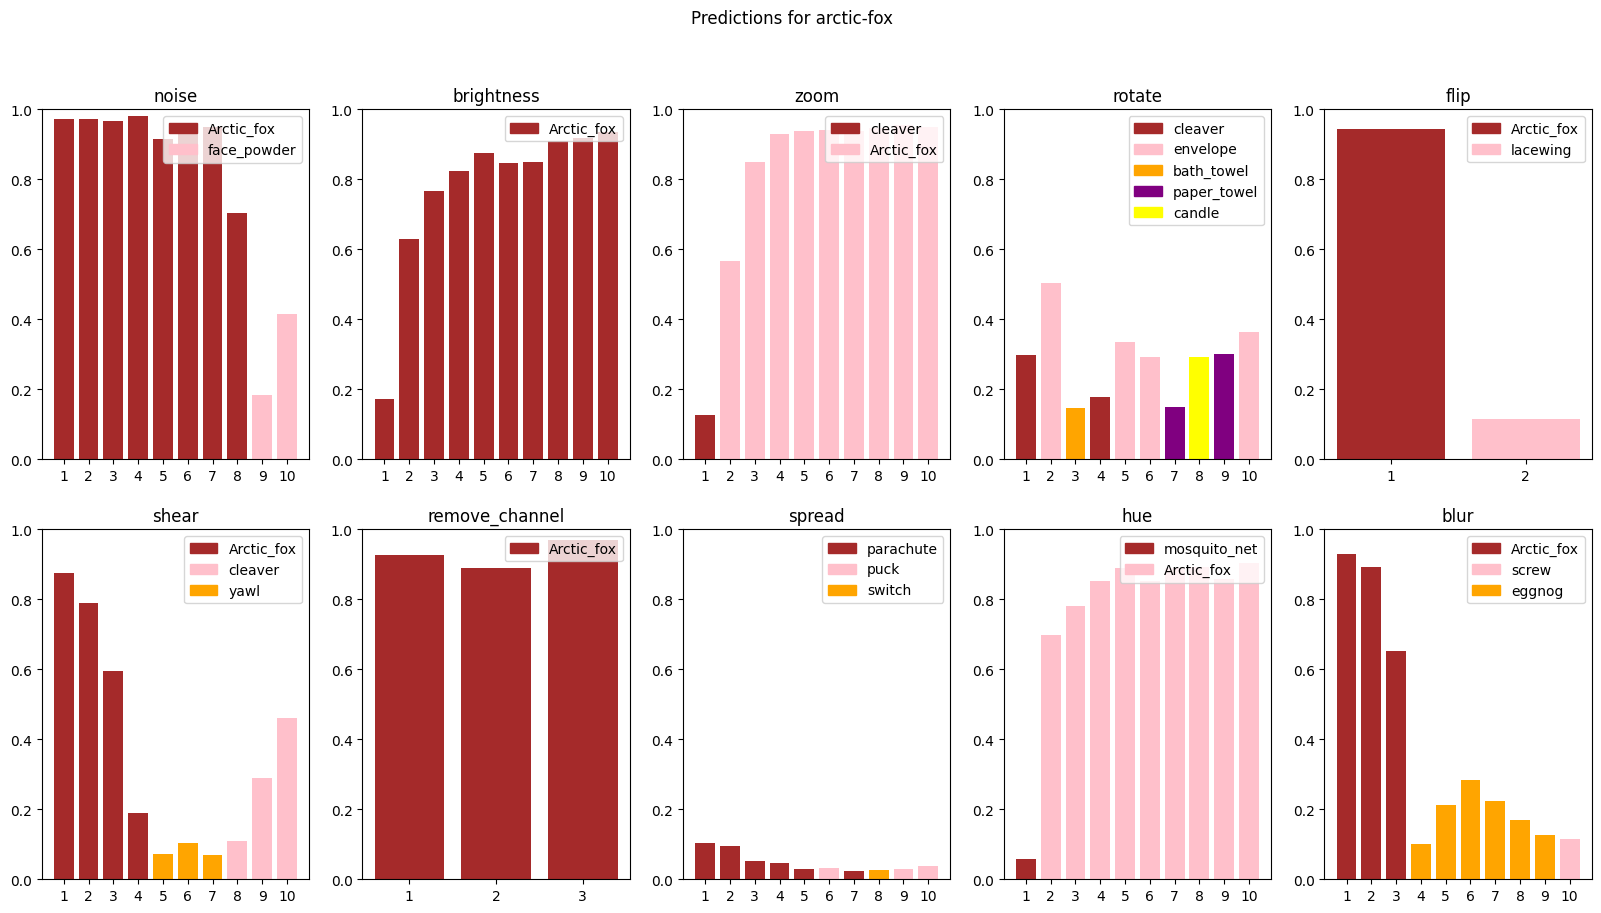

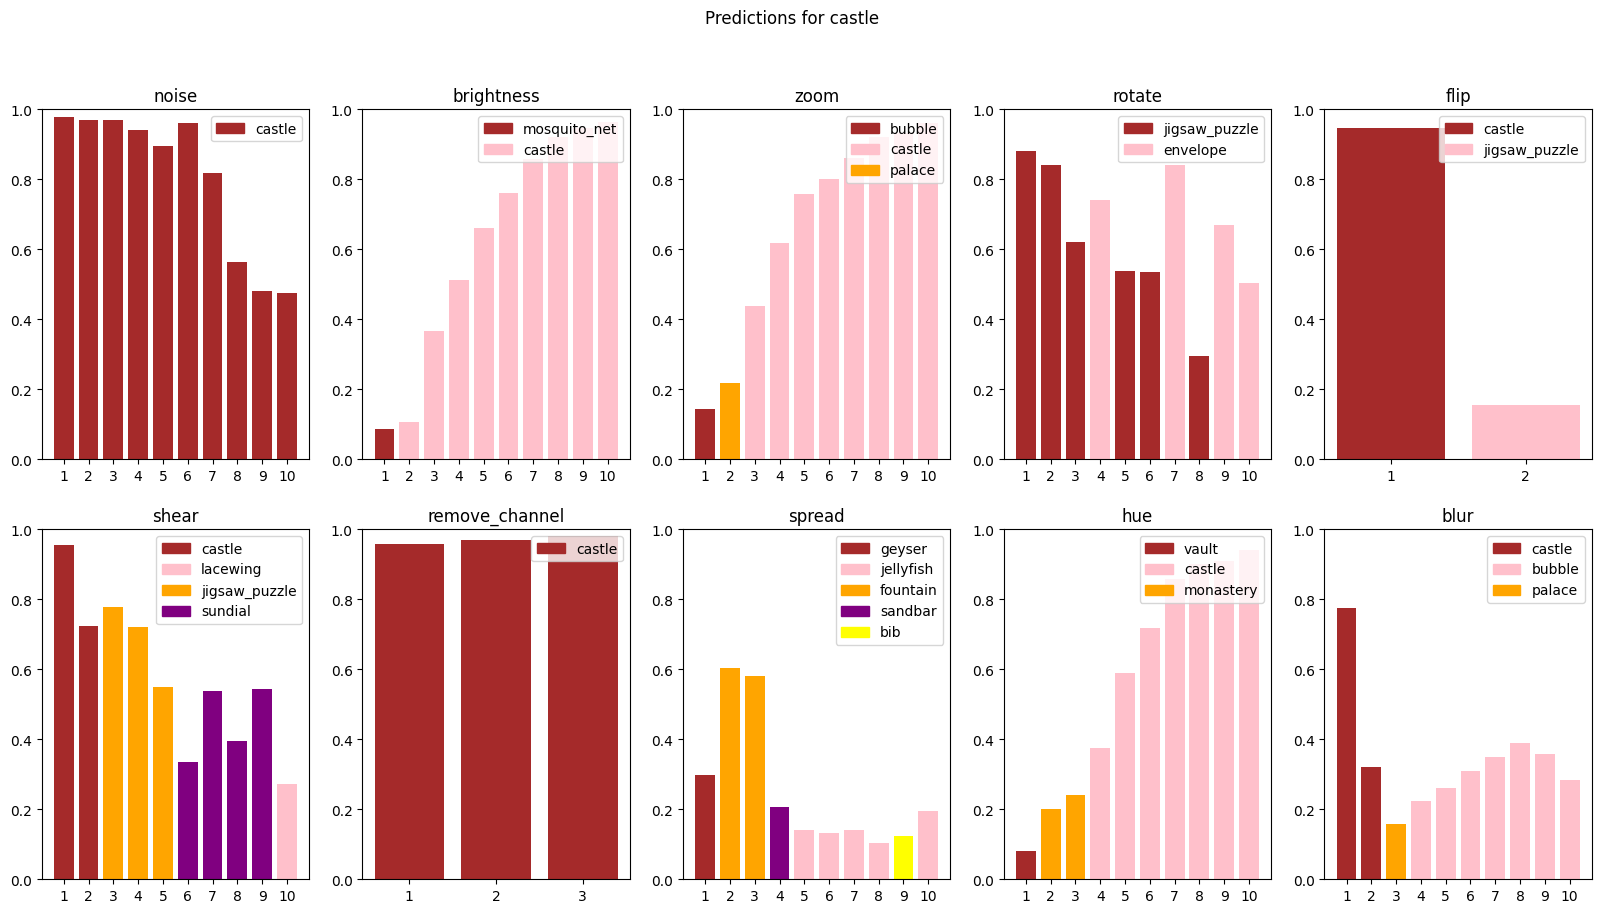

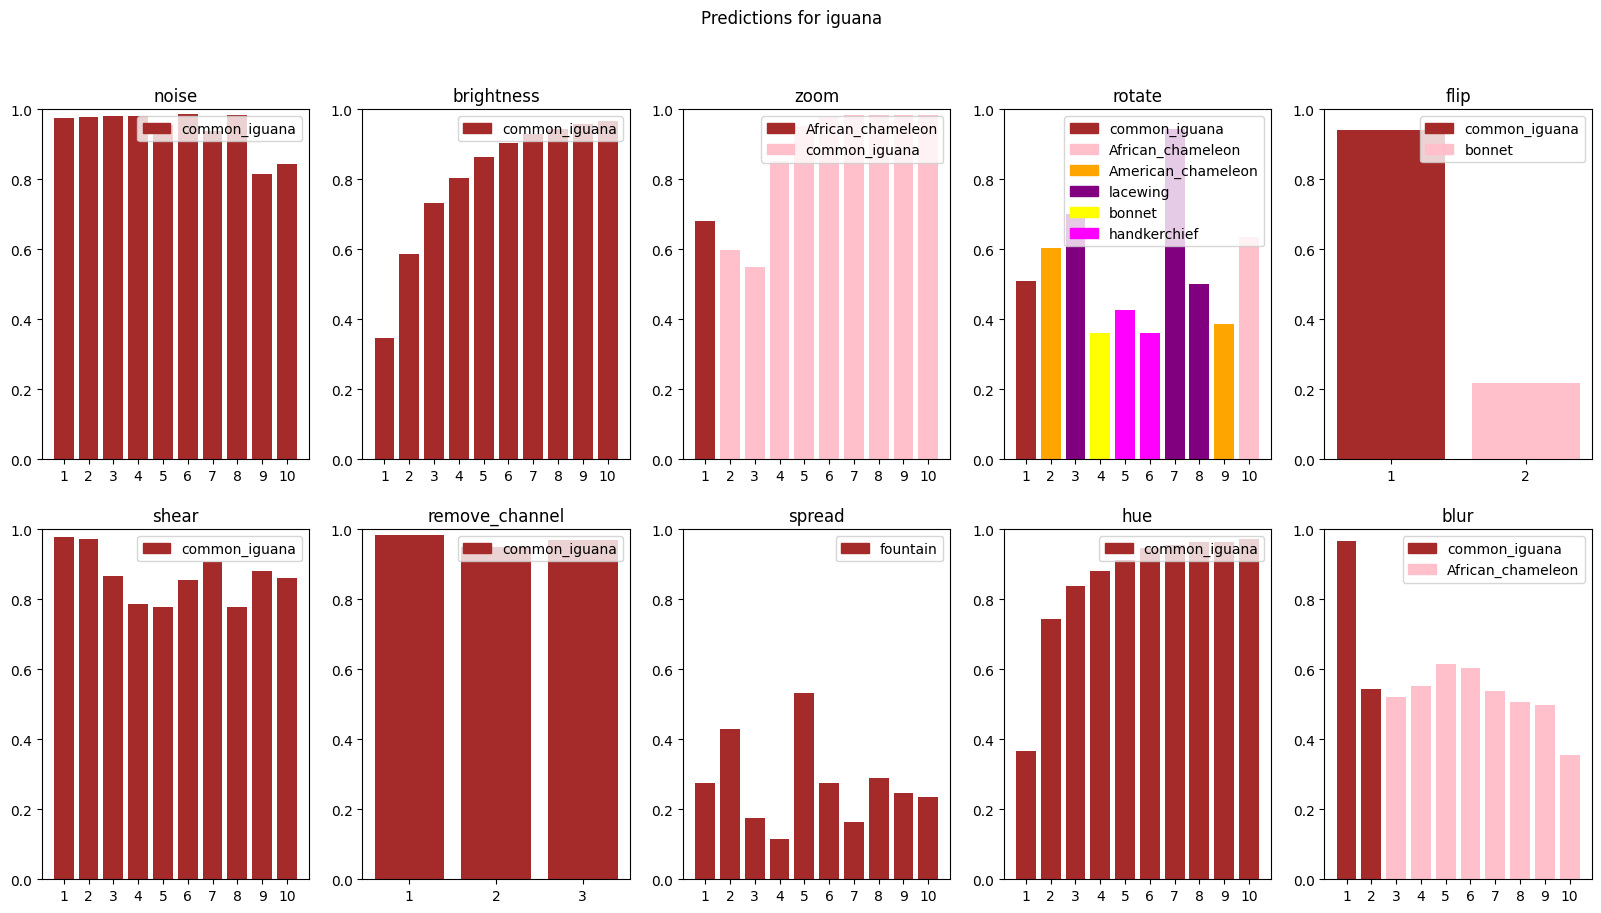

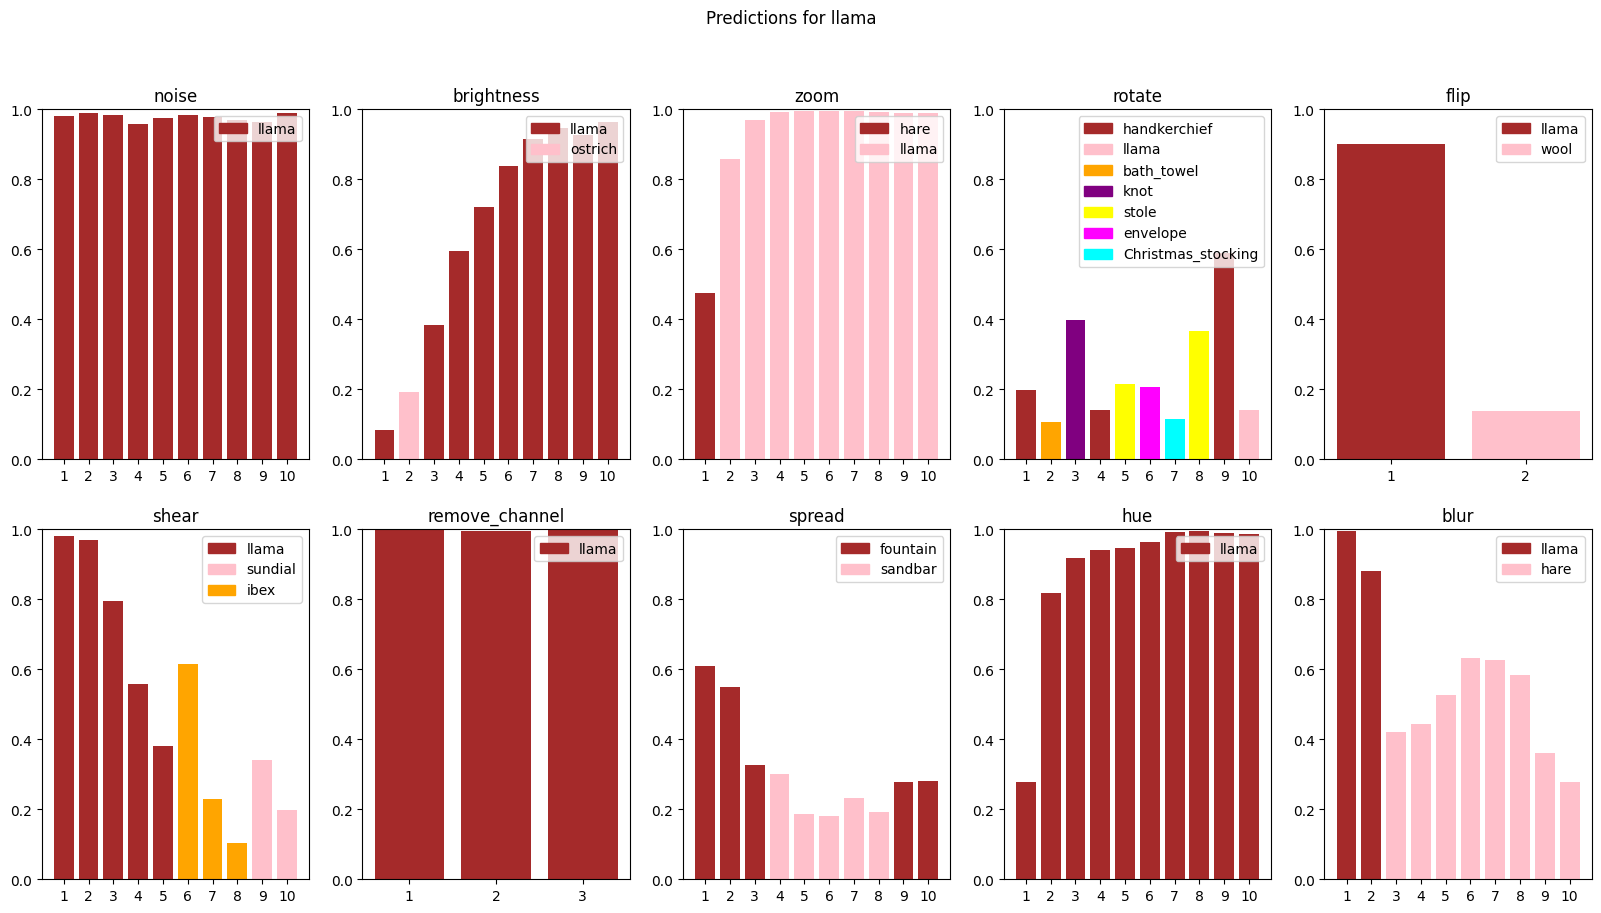

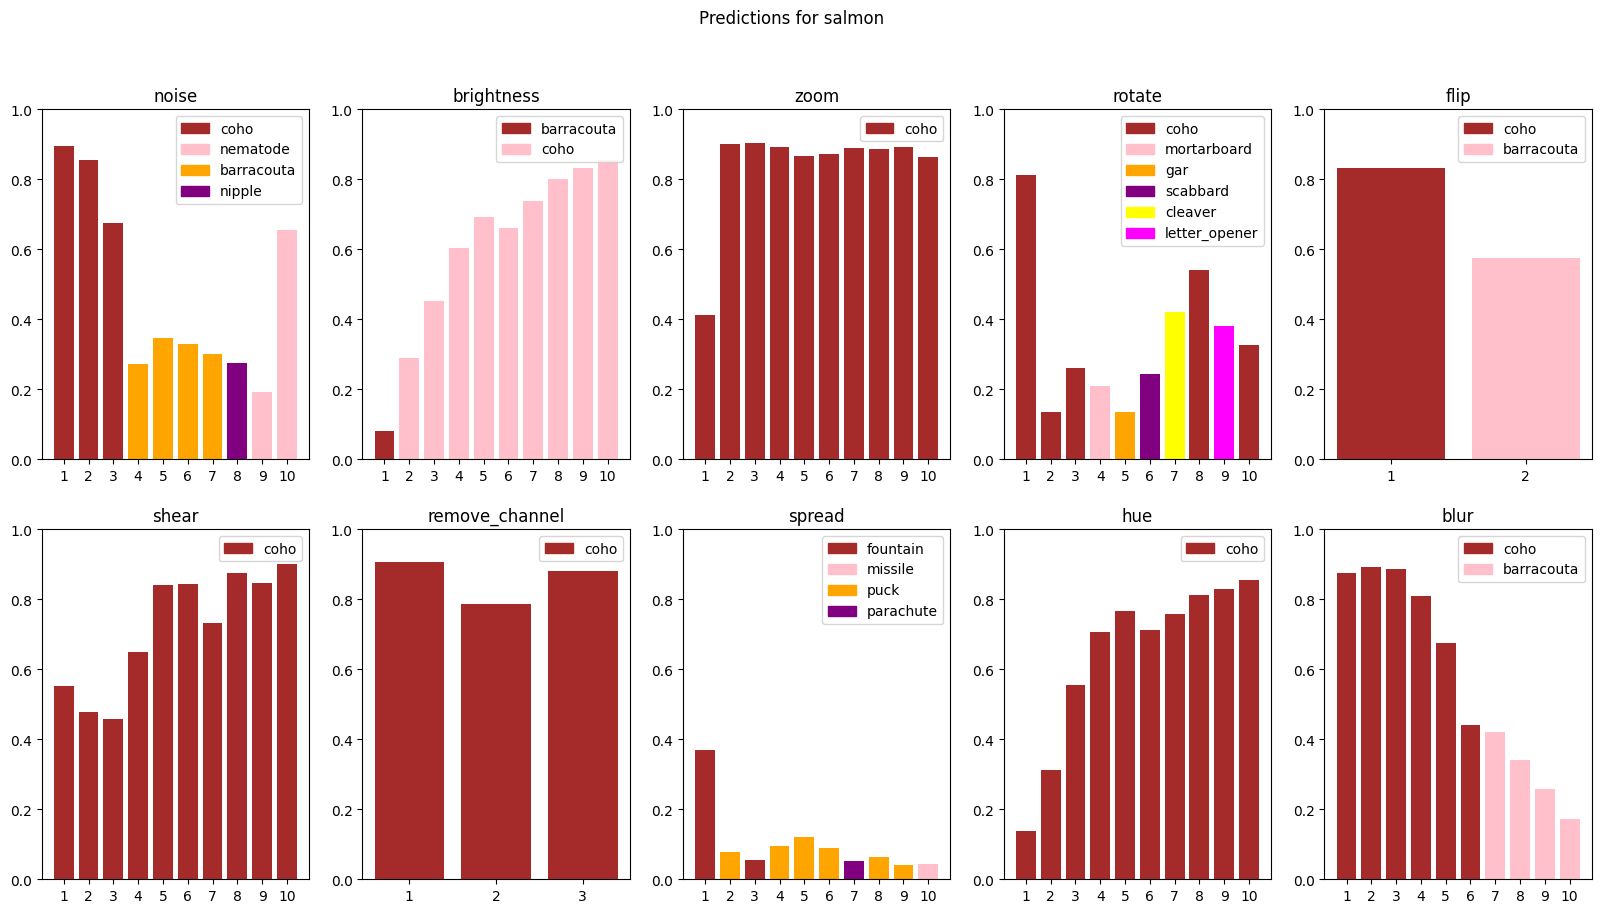

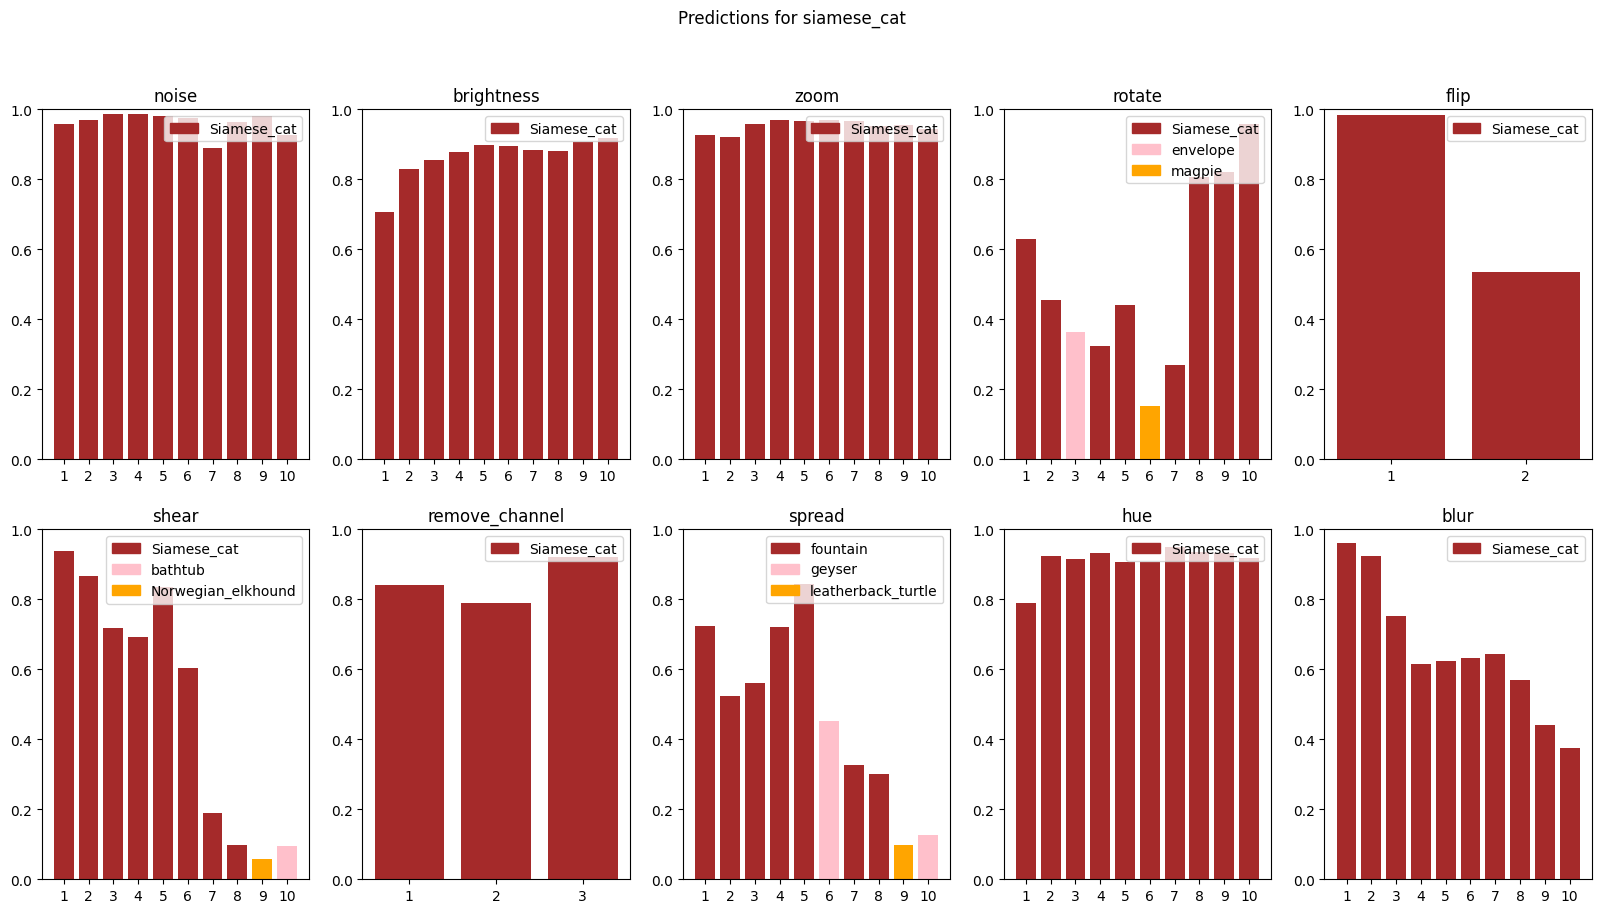

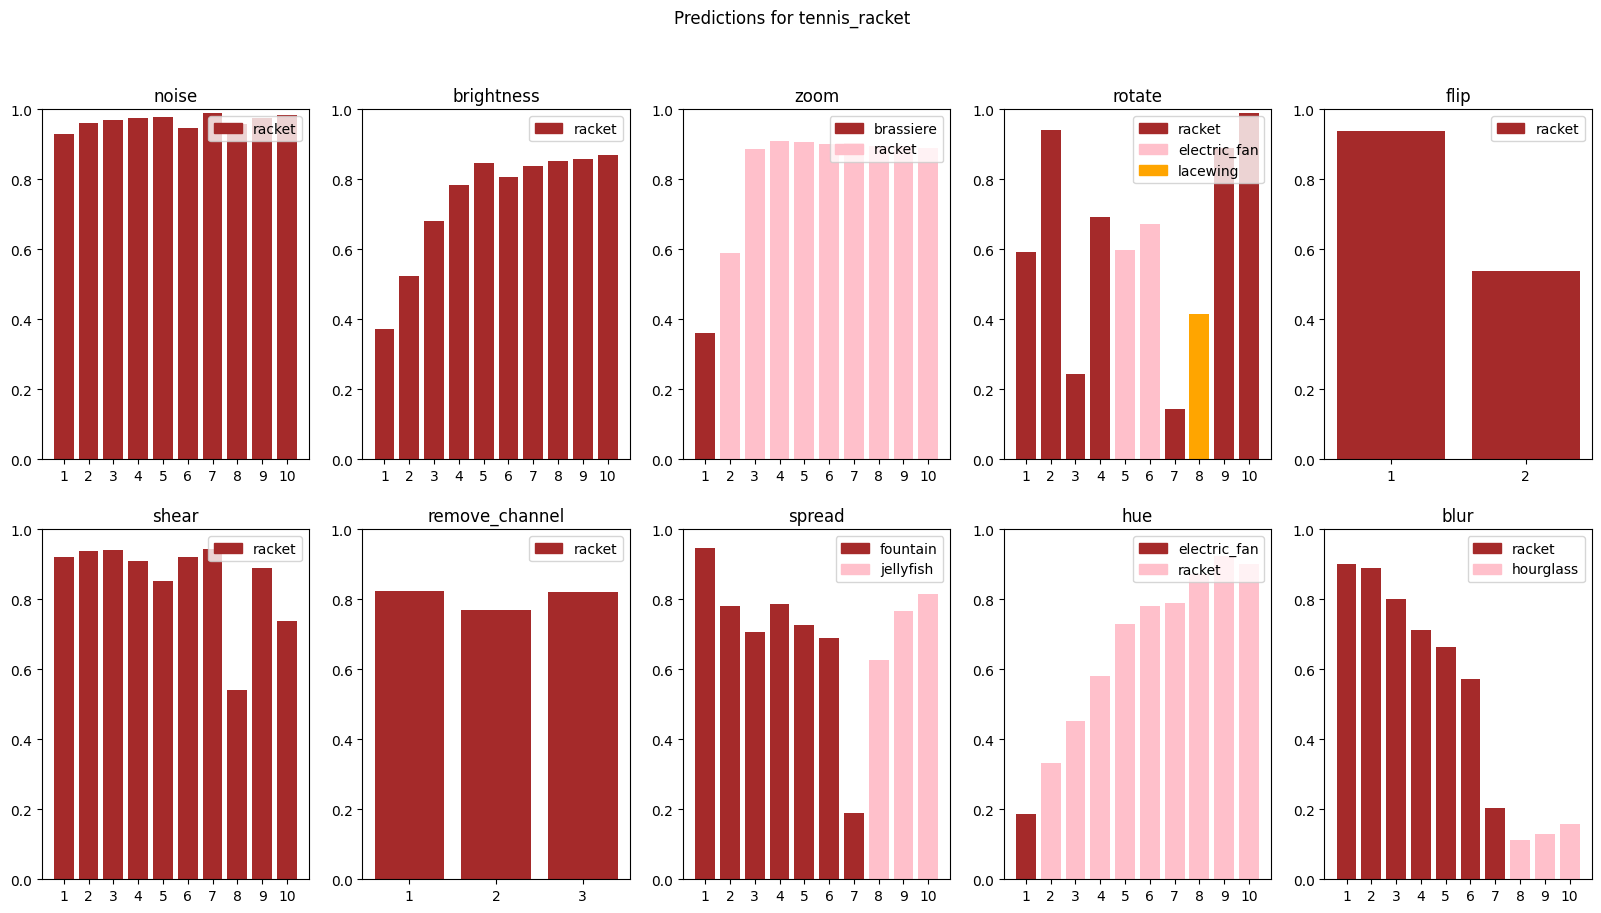

In [109]:
import matplotlib.pyplot as plt

def plot_predictions(predictions):
    for image in predictions.keys():
        fig, axs = plt.subplots(2, 5, figsize=(20, 10))
        fig.suptitle(f"Predictions for {image}")
        for i, transformation in enumerate(predictions[image].keys(), start=1):
            x = [int(name[-5]) if int(name[-5]) != 0 else 10 for name in predictions[image][transformation].keys()]
            y = [predictions[image][transformation][key][1] for key in predictions[image][transformation].keys()]

            colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'purple', 'orange', 'pink', 'brown']
            color_map = {}
            for j, key in enumerate(predictions[image][transformation].keys()):
                if predictions[image][transformation][key][0] not in color_map.keys():
                    color_map[predictions[image]
                                    [transformation][key][0]] = colors.pop()
                axs[int((i-1) / 5), (i-1) % 5].bar(x[j], y[j],
                                                   color=color_map[predictions[image][transformation][key][0]])

            axs[int((i-1) / 5), (i-1) % 5].set_title(transformation)
            axs[int((i-1) / 5), (i-1) % 5].set_ylim(0, 1)
            axs[int((i-1) / 5), (i-1) % 5].set_xticks(x)
            axs[int((i-1) / 5), (i-1) % 5].set_xticklabels([f"{i}" for i in x])
            handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[key]) for key in color_map.keys()]
            labels = color_map.keys()
            axs[int((i-1) / 5), (i-1) % 5].legend(handles, labels, loc='upper right')


        plt.show()

plot_predictions(grouped_predictions)